# Introduction 

The purpose of this data is for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 

## More about the data      

Number of attributes : 17 

Number of rows : 2111

**Independent Variables**

1.   ***Gender*** - (Male/Female) 
2.   ***Age*** - In years
3.   ***Height*** - In meters
4.   ***Weight*** - In Kgs
4.   ***family_history_with_overweight*** - Family history in obesity - Yes or No
5.   ***FAVC*** - Frequent consumption of high caloric food  - Yes/No
6.   ***FCVC*** - Frequency of consumption of vegetables - 1 = never, 2 = sometimes, 3 = always

7.   ***NCP*** - Number of main meals - 1, 2, 3 or 4 meals
8.   ***CAEC*** - Consumption of food between meals - No, Sometimes, Frequently, Always
9.   ***Smoke*** - Does the person smoke - Yes/No
10.  ***CH20*** - Consumption of water daily - 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters
11.  ***SCC*** - Calories consumption monitoring - Yes/No
12.  ***FAF*** - Physical activity frequency - 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days
13.  ***TUE*** - Time using technology devices - 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours
14.  ***CALC*** - Consumption of alcohol - No, Sometimes, Frequently and Always
15.  ***MTRANS*** - Transportation used - Public Transportation, Motorbike, Bike, Automobile and Walking

**Dependent Variables**
1.   ***NObeyesdad*** - Obesity level - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III  

# What are the data types?

Gender - Categorical<br>
Age - Numeric<br>
Height - Numeric<br>
Weight - Numeric<br>
family_history_with_overweight - Categorical<br>
FAVC - Categorical<br>
FCVC - Categorical<br>
NCP - Categorical <br>
CAEC - Categorical<br>
SMOKE - Categorical<br>
CH2O - Categorical<br>
SCC - Categorical<br>
FAF - Categorical<br>
TUE - Categorical<br>
CALC - Categorical<br>
MTRANS - Categorical<br>
NObeyesdad - Categorical<br>


Source - [Table 1](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub)

# Are there missing values?

## Setting up the data


In [167]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import math
import matplotlib
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#installing dependencies
!pip install eli5

# Creating a instance of label Encoder.
le = LabelEncoder()
svc = SVC()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
# Author - @Sai Dutt
# Reading the file and storing columns seperately
data = pd.read_csv("https://raw.githubusercontent.com/Apurva-Nehru/Skunks_Skool/4e9f3d8a9b24ae9dcbd7f17b3ce7a16cc0501b54/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/ObesityClassification_ML_Data_Cleaning_and_feature_selection/ObesityDataSet.csv")


Let us check if our data has been loaded

In [169]:
# Check the dimensions of the data 
print(data.shape)

# First few rows of the dataset 
data.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [170]:
#checking if the any data is missing
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

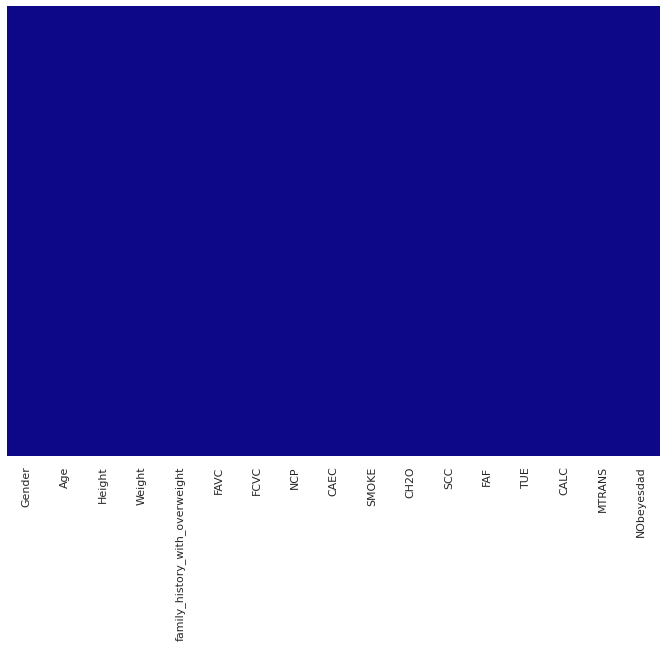

In [171]:
#Check if there are any missing values 
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='plasma')

We see from the above result that there is no missing data.

Let us check for duplicate data. 

In [172]:
#Check how many duplicate rows there are 
dup_data = data[data.duplicated()]
print(dup_data.shape)

(24, 17)


Oops, we see that there are 24 rows of duplicate data. Lets remove them.

In [173]:
#Drop duplicates 
df = data.drop_duplicates(keep='last')

Before we proceed lets validate the data further. We see that there are no empty cells in our data but let us check the validity of the data. Let us validate the categorical data

In [174]:
# Checking unique values of categorical variables
# Author - Sai Dutt
cat_col = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for cat in cat_col:
  print(cat)
  print(data[cat].unique())
  print("\n")

Gender
['Female' 'Male']


family_history_with_overweight
['yes' 'no']


FAVC
['no' 'yes']


CAEC
['Sometimes' 'Frequently' 'Always' 'no']


SMOKE
['no' 'yes']


SCC
['no' 'yes']


CALC
['no' 'Sometimes' 'Frequently' 'Always']


MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




Let us check the validity of the data

In [175]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Data transformation



In [176]:
# Author - Sai Dutt
# Storing colum names in a list for later use
cols = []
for col in data.head(1) :  
  cols.append(col)


Let us take a closer look at the independent variable

In [177]:
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Thats a lot of categories. Let us encode them with numbers. Since, there is a natural heirarchy among the classes this makes sense. 

In [178]:
data['NObeyesdad'] = data['NObeyesdad'].map({'Normal_Weight' : 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 1, 'Insufficient_Weight': 0, \
 'Obesity_Type_I' : 2  , 'Obesity_Type_II' : 2, \
 'Obesity_Type_III' : 2 })


We convert the categorical features into numerical data. Categories such as CAEC, CALC, family_history and MTRANS  follow a set order so this makes sense. The rest are have two classes.  


In [179]:
# Encoding the categories with numeric values
# Author - Sai Dutt

data['CAEC'] = data['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['SMOKE'] = data['SMOKE'].apply(lambda x: ['yes', 'no'].index(x))
data['SCC'] = data['SCC'].apply(lambda x: ['yes', 'no'].index(x))
data['CALC'] = data['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female': 1})
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'no' : 0, 'yes': 1})
data['FAVC'] = data['FAVC'].map({'no' : 0, 'yes': 1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation': 1, 'Walking':2, 'Automobile':3, 'Motorbike':4, 'Bike':5})
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,1,2.0,1,0.0,1.0,0,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,0,3.0,0,3.0,0.0,1,1,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,1,2.0,1,2.0,1.0,2,1,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,1,2.0,1,2.0,0.0,2,2,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,1,2.0,1,0.0,0.0,1,1,1


Let us split the data into training and test sets (70 and 30 respectively) 

In [180]:
#Store the feature and target variable 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(data.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2111, 17)
(2111, 16)
(2111,)
(1477, 16)
(634, 16)
(1477,)
(634,)


# What are the likely distributions of the numeric variables?

Most of our data is categorical with the exception of age, height and weight. We can look at their distribution in our dataset. 

<Figure size 576x360 with 0 Axes>

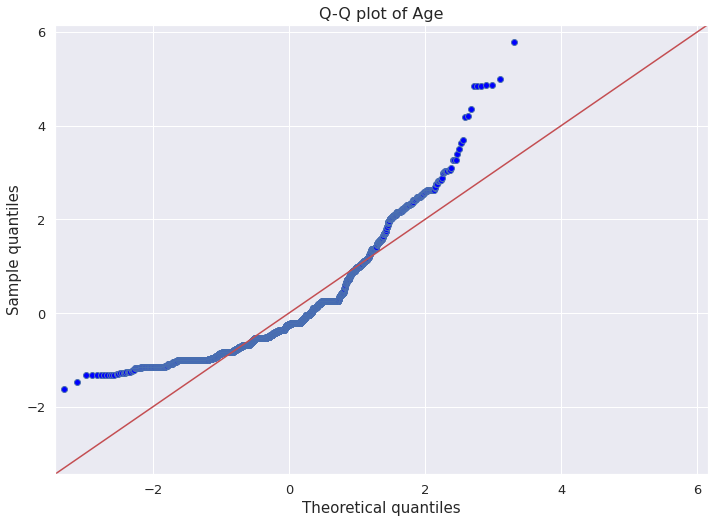

<Figure size 576x360 with 0 Axes>

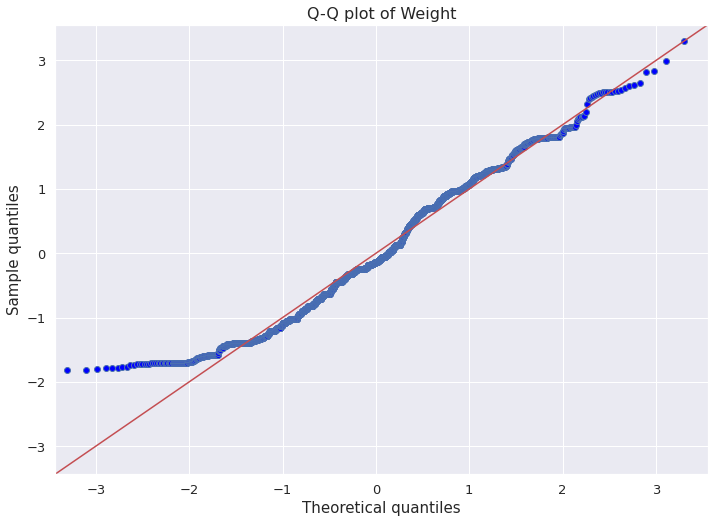

<Figure size 576x360 with 0 Axes>

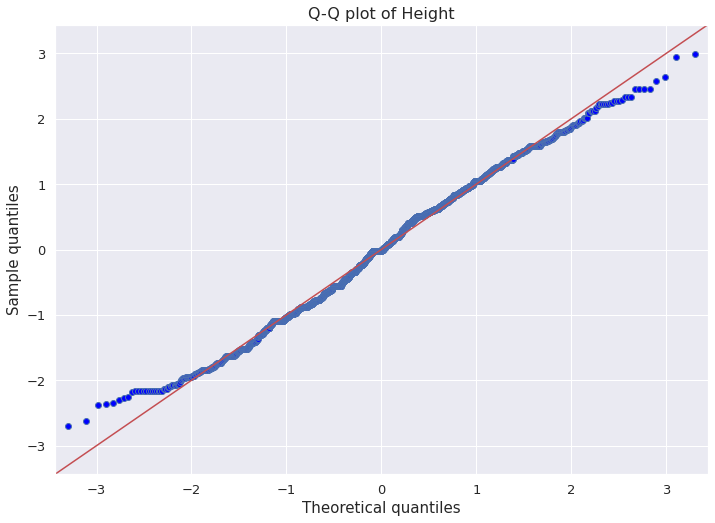

In [181]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age', 'Weight', 'Height']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


Hmm, age doesn't seem to fit the line well. Let us check the histogram

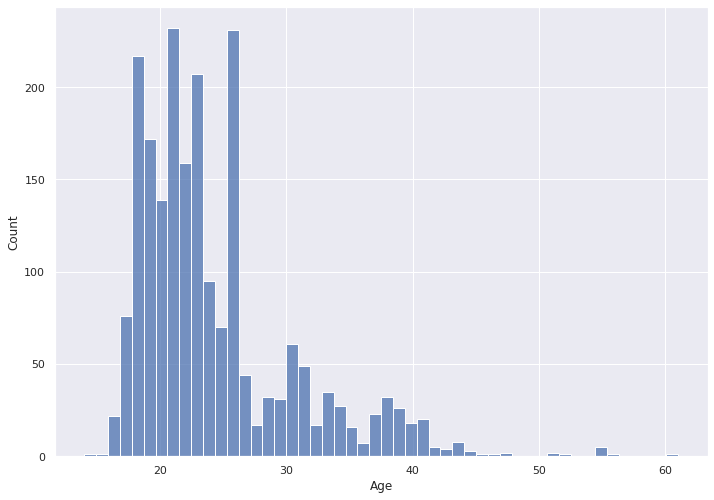

In [182]:
sns.histplot(data=data, x="Age")

As we can see from the above graphs, Height seems to follow the normal distribution and Weight is bimodal but Height seems to be skewed positively i.e the tail is on the right side. 


# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

## Identifying the important features using Random forest classifiers

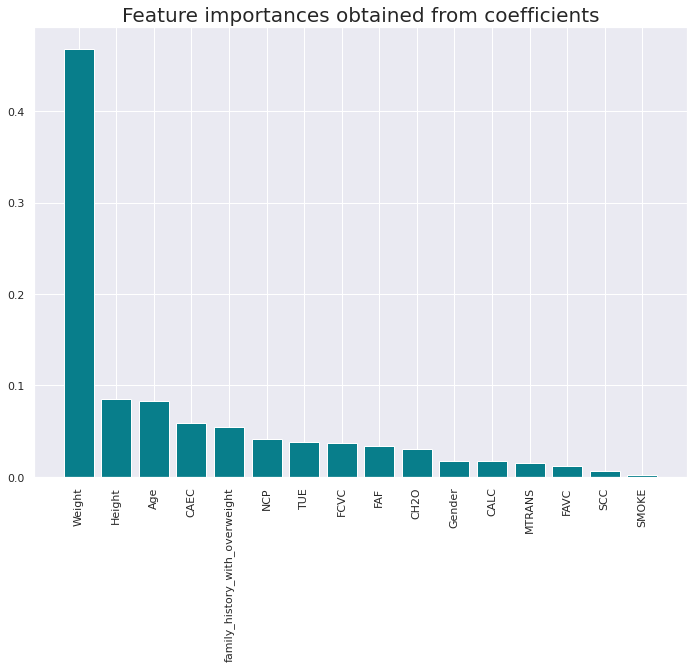

In [183]:
# Source - [6]
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Importance rankings
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Identifying the important features using Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


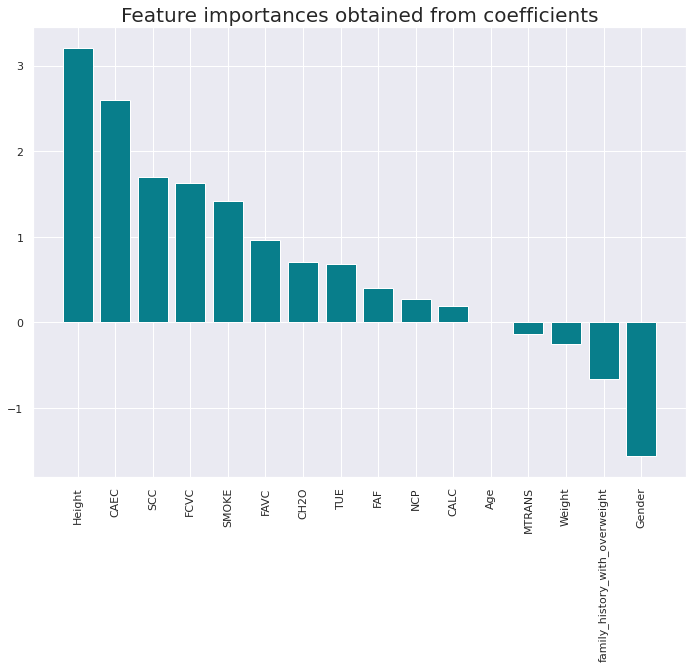

In [184]:
# Source - [6]

model = LogisticRegression()
model.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Hmm, this seems to contradict the output of the random forest classifier. Moreover, it seems to show that weight has a negative importance which can't be right (judging from the heat map) 

## Identifying the important features XGBoost

In [185]:
# Source - [6]
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)


importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})


importances = importances.sort_values(by='Importance', ascending=False)

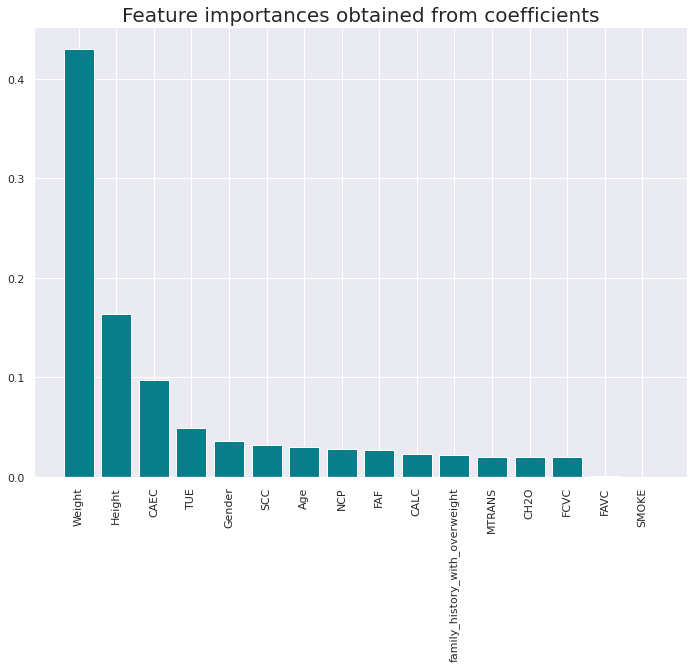

In [186]:
#Source - [6]
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Do the training and test sets have the same data?



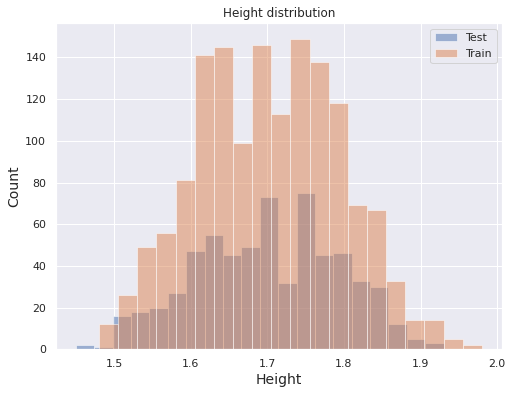

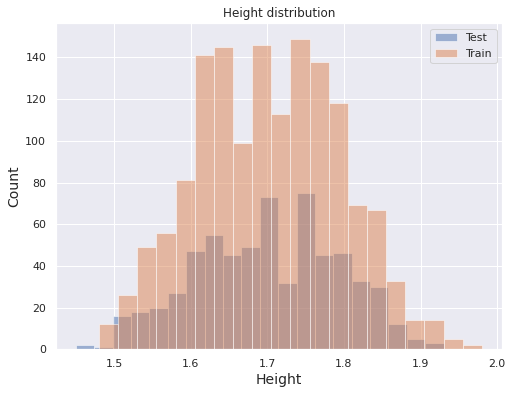

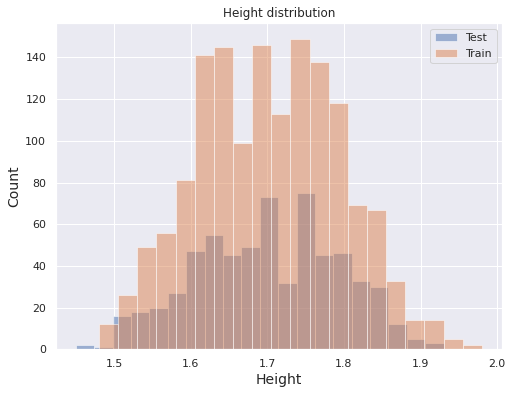

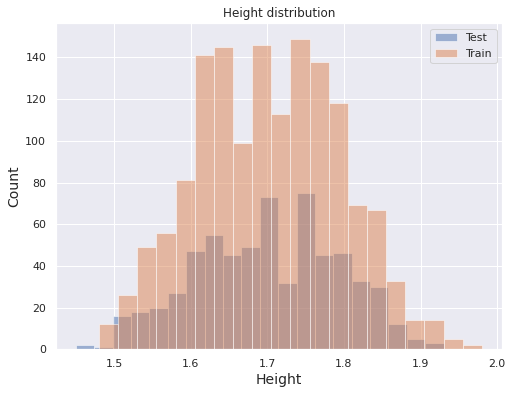

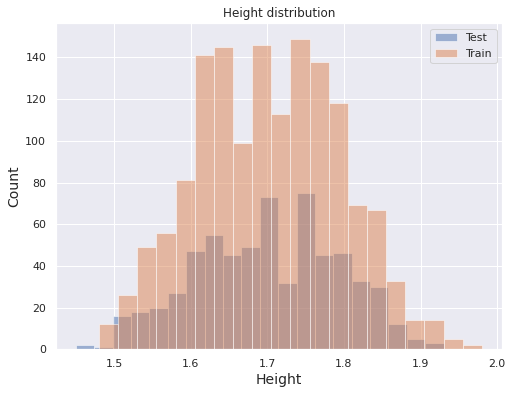

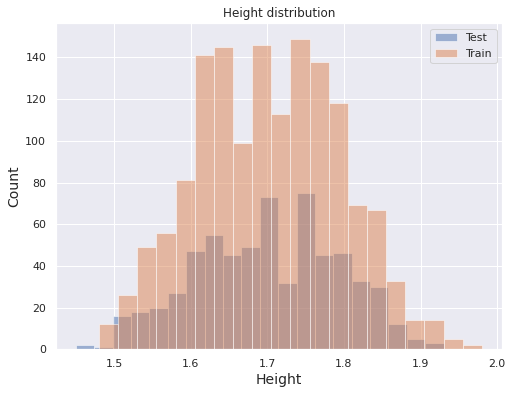

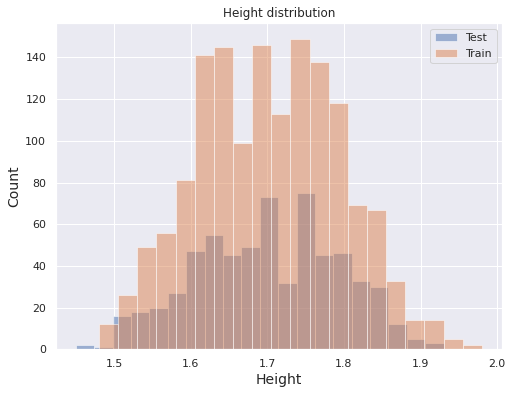

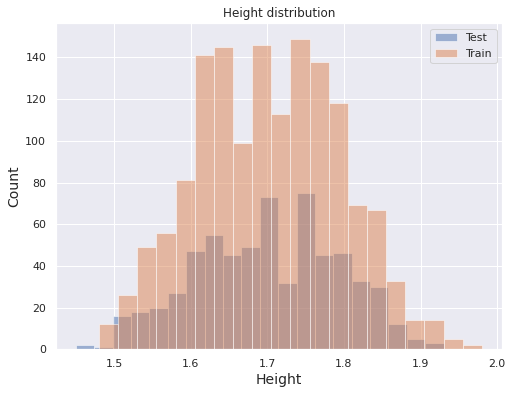

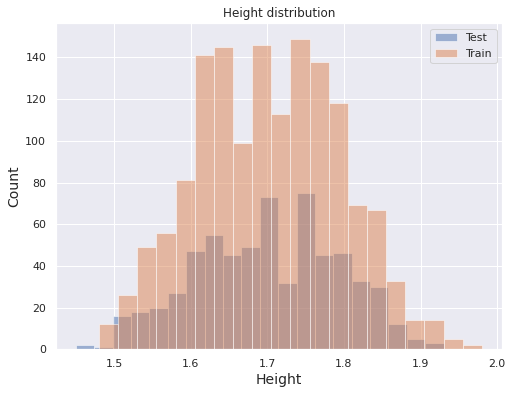

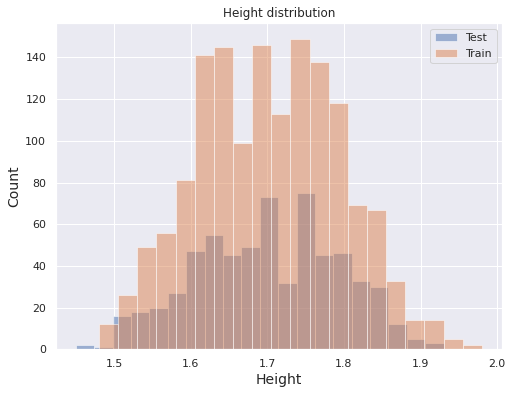

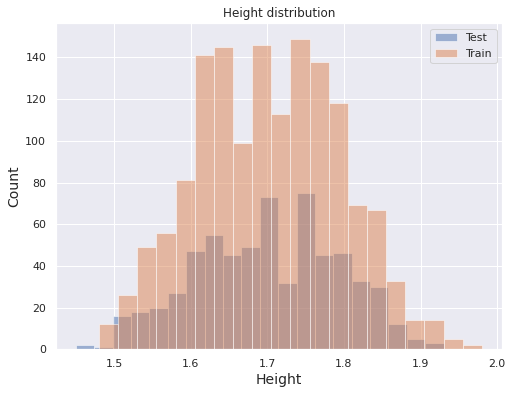

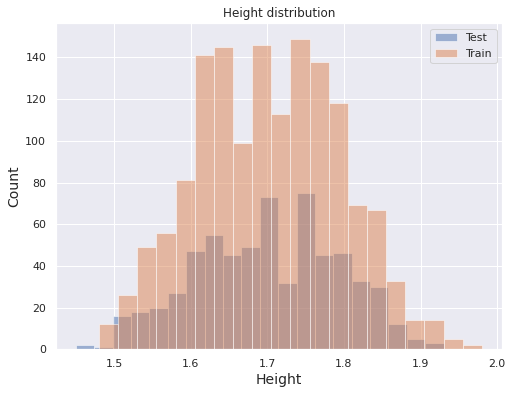

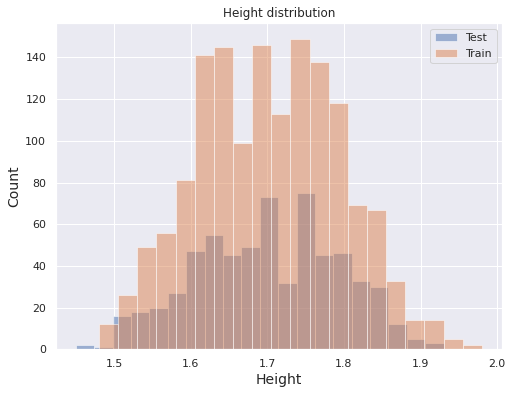

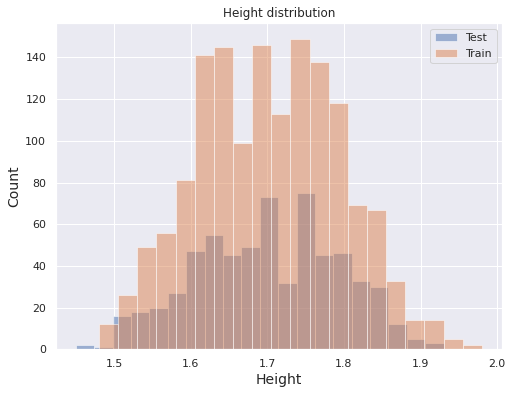

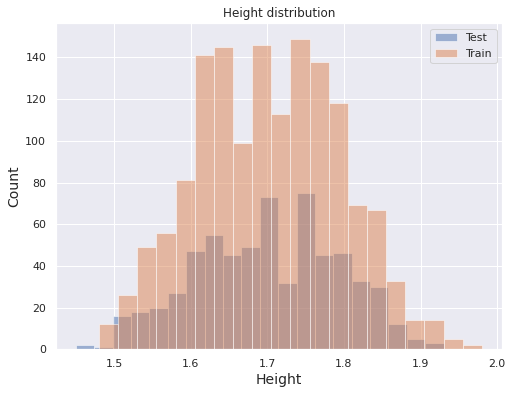

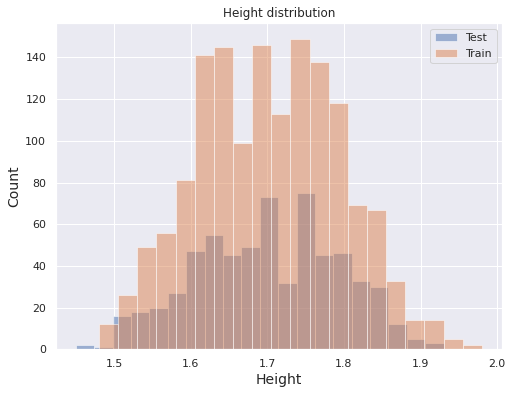

In [187]:
# Source - [3]

X_test_plot = X_test[cols[:-1]]
X_train_plot = X_train[cols[:-1]]

# Plotting the data to see the histogram
for col in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))  
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="Test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="Train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 


Apart from a few boundary values the data split between training set and test set is fine

# Are the predictor variables independent of all the other predictor variables?


In [188]:
# Correlation matrix
data.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,-0.048394,-0.618466,-0.161668,-0.102512,-0.064934,0.274505,-0.067600,0.091543,0.044698,-0.107930,-0.102633,-0.189607,-0.017269,0.007616,-0.164116,-0.042359
Age,-0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,-0.091987,-0.045304,0.116283,-0.144938,-0.296931,0.044487,0.567983,0.308309
Height,-0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,-0.055499,0.213376,0.133753,0.294709,0.051912,0.129732,0.085768,0.144356
Weight,-0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,-0.025746,0.200575,0.201906,-0.051436,-0.071561,0.206677,-0.046615,0.848079
family_history_with_overweight,-0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,-0.017385,0.147437,0.185422,-0.056673,0.022943,-0.036676,0.065036,0.511098
FAVC,-0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,0.050660,0.009719,0.190658,-0.107995,0.068417,0.089520,-0.009102,0.283598
FCVC,0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,-0.014320,0.068461,-0.071852,0.019939,-0.101135,0.060781,-0.065098,0.113146
NCP,-0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,-0.007811,0.057088,0.015624,0.129504,0.036326,0.071747,0.059022,-0.034655
CAEC,0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,-0.055282,-0.144995,-0.109179,0.030110,0.048567,-0.047540,-0.003556,-0.367379
SMOKE,0.044698,-0.091987,-0.055499,-0.025746,-0.017385,0.050660,-0.014320,-0.007811,-0.055282,1.000000,0.031995,0.047731,-0.011216,-0.017613,-0.082471,-0.021045,0.002433


Wow, thats a lot. Lets use the heatmap instead. 

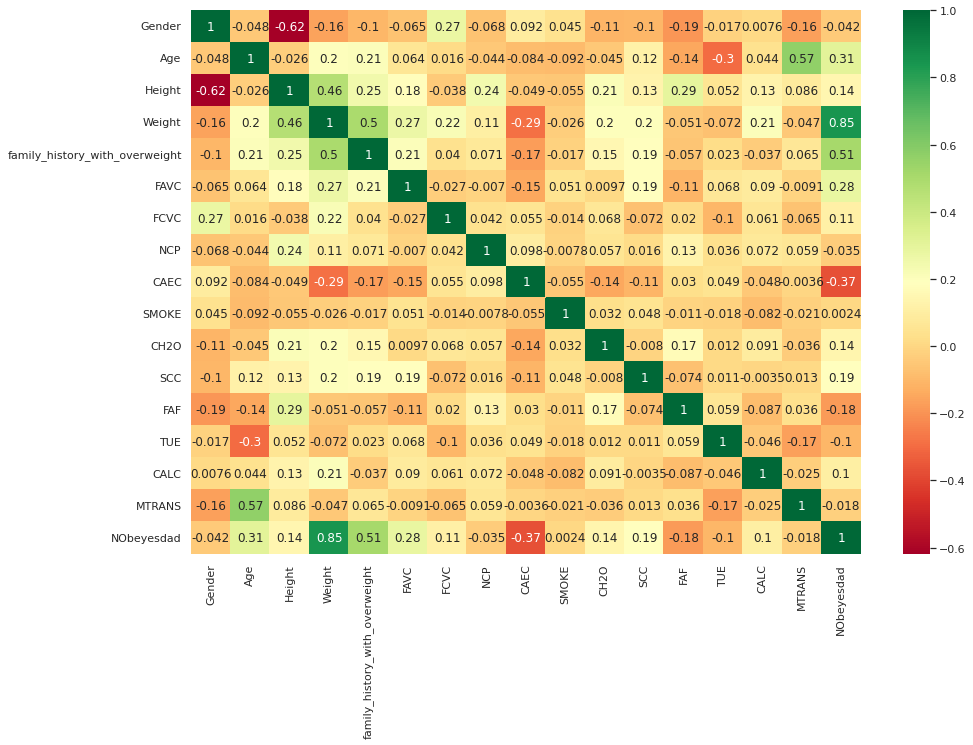

In [189]:
# Source - [2]
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn') 

From the heat map we see that there seems to be a strong correlation between Weight and Obesity level which is to be expected. Moreover there is an inverse correlation between height and gender. 


# Which predictor variables are the most important?


In [190]:
#Using OLS for finding the p value to check the significant features [3]

model = sm.OLS(data['NObeyesdad'], data[cols]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             NObeyesdad   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.628e+30
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                        0.00
Time:                        03:40:39   Log-Likelihood:                          65064.
No. Observations:                2111   AIC:                                 -1.301e+05
Df Residuals:                    2094   BIC:                                 -1.300e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                         -2.758e-15   5.06e-16     -5.455      0.000   -3.75e-15   -1.77e-15
Age                              2.98e-16   4.69e-17      6.360      0.000    2.06e-16     3.9e-16
Height                         -3.227e-16   1.68e-15     -0.192      0.848   -3.62e-15    2.98e-15
Weight                          3.621e-17   2.01e-17      1.800      0.072   -3.23e-18    7.57e-17
family_history_with_overweight  4.306e-16   6.86e-16      0.628      0.530   -9.14e-16    1.78e-15
FAVC                            3.398e-16   7.35e-16      0.462      0.644    -1.1e-15    1.78e-15
FCVC                             1.48e-16   4.53e-16      0.327      0.744    -7.4e-16    1.04e-15
NCP                             6.449e-16   2.96e-16      2.181      0.029    6.49e-17    1.22e-15
CAEC                            7.318e-17   5.12e-16      0.143      0.886   -9.31e-16    1.08e-15
SMOKE                          -4.783e-16    1.5e-15     -0.319      0.750   -3.42e-15    2.46e-15
CH2O                           -5.265e-16   3.76e-16     -1.399      0.162   -1.26e-15    2.12e-16
SCC                            -2.089e-16   1.09e-15     -0.191      0.849   -2.36e-15    1.94e-15
FAF                             2.888e-16   2.81e-16      1.027      0.305   -2.63e-16     8.4e-16
TUE                            -4.121e-16    3.8e-16     -1.083      0.279   -1.16e-15    3.34e-16
CALC                            1.081e-15    4.5e-16      2.403      0.016    1.99e-16    1.96e-15
MTRANS                         -5.719e-16   3.23e-16     -1.769      0.077   -1.21e-15    6.21e-17
NObeyesdad                         1.0000   6.19e-16   1.61e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        7.977   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.999
Skew:                          -0.151   Prob(JB):                       0.0183
Kurtosis:                       3.003   Cond. No.                         868.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gender, Age, NCP and CALC have a p value < 0.05. They might not follow the null hypothesis. It can be noted that weight has a p value > 0.05. 

# Do the ranges of the predictor variables make sense?




In [191]:
#Checking the Ranges of the predictor variables and dependent variable
data.iloc[:, 1:4].describe()

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058
std,6.345968,0.093305,26.191172
min,14.000000,1.450000,39.000000
25%,19.947192,1.630000,65.473343
50%,22.777890,1.700499,83.000000
75%,26.000000,1.768464,107.430682
max,61.000000,1.980000,173.000000


The above ranges of age height and weight make sense. 

# What are the distributions of the predictor variables?
We see from the QQ-Plots that roughly the numeric varibles follow the normal distribution. 

# Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Let us look at the box-plot of the numerical variables for a better understanding. 

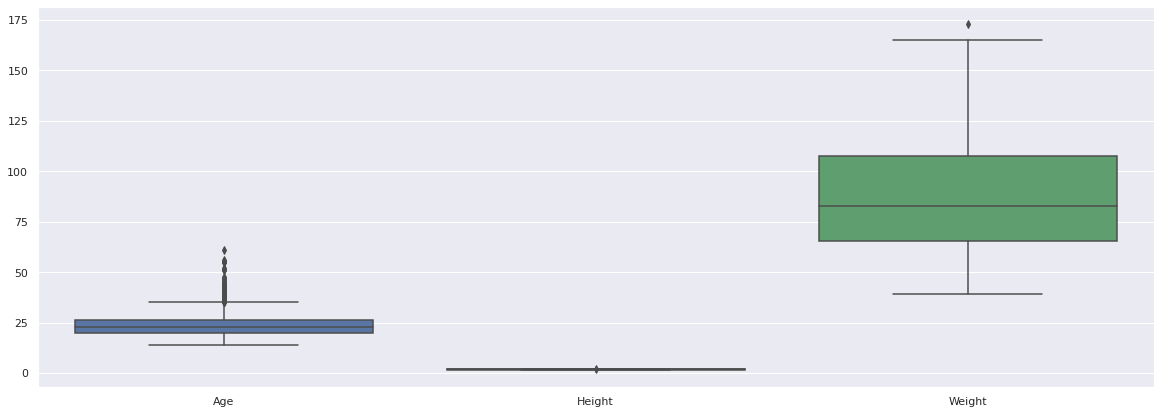

In [192]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing[3]
plt.figure(figsize=(20,7))
sns.boxplot(data=data.iloc[:, 1:4])

When it comes to age there are a lot of outliers, mostly older people. Hence removing the outliers will affect the final predictive model.

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.




In [193]:
data1 = data.mask(np.random.random(data.shape) < .01)

In [194]:
data10 = data.mask(np.random.random(data.shape) < .1)

In [195]:
data5 = data.mask(np.random.random(data.shape) < .05)

## Imputing missing values using KNN Imputer

In [196]:
#Author -Sai Dutt
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
new_data1 = pd.DataFrame(imputer.fit_transform(data1),columns = data1.columns)
new_data10 = pd.DataFrame(imputer.fit_transform(data10),columns = data10.columns)
new_data5 = pd.DataFrame(imputer.fit_transform(data5),columns = data5.columns)


#References

[1] - [Comprehensive data exploration with python](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook)

[2] - [Obesity classification and data analysis](https://medium.com/geekculture/obesity-classification-and-data-analysis-via-machine-learning-6635682f0f87)

[3] - [Abalone EDA](https://github.com/aiskunks/Skunks_Skool/blob/e662b7d0be79e471e1e0e08ce820678de509b694/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb)

[4] - [Outlier detection](https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32)

[5] - [Outlier calculation](https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python)

[6] - [Feature importance](https://python-bloggers.com/2021/01/3-essential-ways-to-calculate-feature-importance-in-python/)

# Licensing

Copyright 2022 Sai Dutt

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.